###Prepared by: Michael Akinosho
###Date: November 13th, 2021

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [66]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
filename = '/content/drive/Othercomputers/My Laptop/data-science-assignments/06 - Decision Trees Random Forests/Boston_Housing_from_Sklearn.csv'

In [68]:
df = pd.read_csv(filename,header=0)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [69]:
df.corr()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


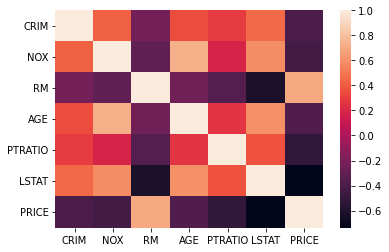

In [70]:
sns_heatmap = sns.heatmap(df.corr())

In [71]:
#Creating the dataframes for X and y
#Keeping the following features for X: RM, PTRATIO, LSTAT
y = df['PRICE']
X = df.drop(columns=['PRICE','CRIM','NOX','AGE'])

In [72]:
#Creating the Train Test Split
#Appears the random state of 42 is causing over-fitting
#Leaving this value based on instructions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [74]:
dec_tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [75]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [76]:
train_score = dec_tree.score(X_train,y_train)
test_score = dec_tree.score(X_test,y_test)
print(train_score)
print(test_score)

1.0
0.46034649239225756


In [77]:
dec_tree.get_depth()

20

In [78]:
#List of values to try for max_depth
max_depth_range = list(range(2,21))
#List of store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth= depth,random_state=42)
    dec_tree.fit(X_train,y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

In [79]:
r2

[0.6370379660938669,
 0.6410142167887275,
 0.6871502333691624,
 0.6922687978091351,
 0.7200322619567403,
 0.65178824726002,
 0.4866656083349987,
 0.6134089546693543,
 0.5967707030080778,
 0.47318086650235736,
 0.4636283956864659,
 0.46074132300892295,
 0.46070130502483025,
 0.4632714259148108,
 0.455109610877119,
 0.4521832823584897,
 0.45577842871365315,
 0.44604916802409056,
 0.46034649239225756]

In [80]:
#Optimal depth is index of max r2 score plus 2
#Adding two since the list range used in the for loop above started at 2
#Indicating that we started the depth level from 2 up and including 20
print('Optimal depth level is: {}'.format(r2.index(max(r2)) + 2))

Optimal depth level is: 6


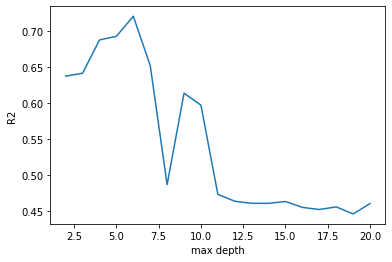

In [81]:
#Visualize which max_depth leads to the highest r2 score
plt.plot(max_depth_range, r2);
plt.xlabel('max depth')
plt.ylabel('R2')
plt.show;

In [82]:
dec_tree_6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dec_tree_6.fit(X_train,y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)
print(train_6_score)
print(test_6_score)

0.9214827076541541
0.7200322619567403


In [83]:
#This gives the depth level with the highest r2 score for the test,
#but has one of the widest gap for r2 scores between train and test